In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [128]:
Col_Names = 'N, P, K, temperature, humidity, ph, rainfall, label'

In [129]:
DCCC = pd.read_csv("Crop_Recommendation (1).csv")

In [130]:
print(DCCC.head(10))

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice


In [131]:
A = DCCC.iloc[:, :-1]
B = DCCC.iloc[:, -1]

In [132]:
B = [1 if ys == "rice" else 0 for ys in B]

In [133]:
A_train, A_test, ys_train, ys_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [134]:
Cross_Valid_Score=[]
N=list(range(1,51))
k1=KFold(n_splits=5,random_state=42,shuffle=True)

for k in N:
    K_N_N=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(K_N_N,A,B,cv=k1,scoring='accuracy')
    Cross_Valid_Score.append(score.mean())


In [136]:
print(Cross_Valid_Score)

[0.9895454545454546, 0.99, 0.99, 0.9895454545454546, 0.9881818181818183, 0.9904545454545455, 0.9886363636363636, 0.9895454545454546, 0.989090909090909, 0.9877272727272729, 0.9881818181818183, 0.9868181818181819, 0.9872727272727273, 0.9881818181818183, 0.9895454545454546, 0.9886363636363636, 0.9886363636363636, 0.9886363636363636, 0.9877272727272727, 0.9872727272727273, 0.9886363636363636, 0.9872727272727273, 0.9881818181818183, 0.9881818181818183, 0.9877272727272729, 0.9881818181818183, 0.9886363636363636, 0.9877272727272729, 0.9886363636363636, 0.9872727272727273, 0.9886363636363636, 0.9872727272727273, 0.9881818181818183, 0.9868181818181819, 0.9872727272727273, 0.9877272727272729, 0.9872727272727273, 0.9872727272727273, 0.9868181818181817, 0.9863636363636363, 0.985909090909091, 0.9863636363636363, 0.985909090909091, 0.985909090909091, 0.9854545454545456, 0.9854545454545456, 0.985, 0.9854545454545456, 0.9854545454545456, 0.985909090909091]


In [137]:
Max_Acc = max(Cross_Valid_Score)
Best_Values = [i for i, value in enumerate(Cross_Valid_Score) if value == Max_Acc]

for i, value in enumerate(Cross_Valid_Score):
    print(i, value)

print("The best indices with the maximum accuracy score:", Best_Values)


0 0.9895454545454546
1 0.99
2 0.99
3 0.9895454545454546
4 0.9881818181818183
5 0.9904545454545455
6 0.9886363636363636
7 0.9895454545454546
8 0.989090909090909
9 0.9877272727272729
10 0.9881818181818183
11 0.9868181818181819
12 0.9872727272727273
13 0.9881818181818183
14 0.9895454545454546
15 0.9886363636363636
16 0.9886363636363636
17 0.9886363636363636
18 0.9877272727272727
19 0.9872727272727273
20 0.9886363636363636
21 0.9872727272727273
22 0.9881818181818183
23 0.9881818181818183
24 0.9877272727272729
25 0.9881818181818183
26 0.9886363636363636
27 0.9877272727272729
28 0.9886363636363636
29 0.9872727272727273
30 0.9886363636363636
31 0.9872727272727273
32 0.9881818181818183
33 0.9868181818181819
34 0.9872727272727273
35 0.9877272727272729
36 0.9872727272727273
37 0.9872727272727273
38 0.9868181818181817
39 0.9863636363636363
40 0.985909090909091
41 0.9863636363636363
42 0.985909090909091
43 0.985909090909091
44 0.9854545454545456
45 0.9854545454545456
46 0.985
47 0.9854545454545456

In [138]:
figure,ax=pt.subplots(1,1)
pt.plot(N,Cross_Valid_Score, label='CV_Score', linestyle='-', color='orange')
ax.grid(True, linestyle='--', alpha=0.7)
pt.xlabel("N: of Neighbors K")
pt.ylabel("Cross_Validation_Accuracy")
pt.legend(loc='upper right')
plt.savefig('CROSS_VALID_ACC.png', format='png')

In [139]:
A_train, A_test, ys_train, ys_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [140]:
for k in Best_Values:
    kn= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    kn_fit=kn.fit(A_train,ys_train)
    prediction_kn=kn.predict(A_test)
    print("Accuracy:")
    print("\n", (accuracy_score(ys_test, prediction_kn)))
    print("___________________________________________________________________")
    print("Confusion Matrix:")
    print("\n", confusion_matrix(ys_test,prediction_kn))
    print("___________________________________________________________________")
    print("Classification report:")
    print("\n", classification_report(ys_test,prediction_kn))
    print("___________________________________________________________________")

Accuracy:

 0.9840909090909091
___________________________________________________________________
Confusion Matrix:

 [[420   1]
 [  6  13]]
___________________________________________________________________
Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       421
           1       0.93      0.68      0.79        19

    accuracy                           0.98       440
   macro avg       0.96      0.84      0.89       440
weighted avg       0.98      0.98      0.98       440

___________________________________________________________________


In [141]:
c=DCCC.copy()
X1 = DCCC.iloc[:, :-1]
Y1 = DCCC.iloc[:, -1]

In [142]:
print(X1)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [143]:
print(Y1)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [144]:
Y1= np.where(Y1=='rice',1,0)

In [145]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [146]:
L_G=LogisticRegression()
L_G_Reg_Fit=L_G.fit(X1_train,y1_train)
L_G_Predict=L_G.predict(X1_test)
print("Accuracy Score: ")
print("\n", accuracy_score(y1_test,L_G_Predict))
print("___________________________________________________________________")
print("Confusion Matrix")
print("\n", confusion_matrix(y1_test,L_G_Predict))
print("___________________________________________________________________")
print("Classification_Report")
print("\n", classification_report(y1_test,L_G_Predict))
print("___________________________________________________________________")


Accuracy Score: 

 0.9795454545454545
___________________________________________________________________
Confusion Matrix

 [[418   3]
 [  6  13]]
___________________________________________________________________
Classification_Report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       0.81      0.68      0.74        19

    accuracy                           0.98       440
   macro avg       0.90      0.84      0.87       440
weighted avg       0.98      0.98      0.98       440

___________________________________________________________________


In [147]:
P_B=L_G_Reg_Fit.predict_proba(X1_test)
Pre_dict = P_B[:,1]
fr, tr, threshold = roc_curve(y1_test, Pre_dict)

In [148]:
print(fr)

[0.         0.         0.         0.0023753  0.0023753  0.00475059
 0.00475059 0.00712589 0.00712589 0.00950119 0.00950119 0.01662708
 0.01662708 1.        ]


In [149]:
print(tr)

[0.         0.05263158 0.47368421 0.47368421 0.57894737 0.57894737
 0.63157895 0.63157895 0.68421053 0.68421053 0.94736842 0.94736842
 1.         1.        ]


In [150]:
R_S = roc_auc_score(y1_test,Pre_dict)
print("The r_score is",R_S)

The r_score is 0.9957494686835854


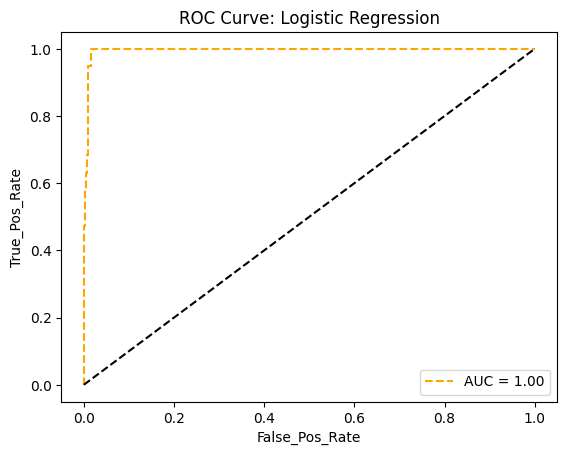

<Figure size 640x480 with 0 Axes>

In [152]:
figure,ax=pt.subplots(1,1)
pt.plot(fr, tr, linestyle='--', color='orange',label = 'AUC = %0.2f' % R_S)
pt.legend(loc = 'best')
pt.title('ROC Curve: Logistic Regression')
pt.plot([0, 1], [0, 1], linestyle='--', color='black')
pt.ylabel('True_Pos_Rate')
pt.xlabel('False_Pos_Rate')
pt.show()
plt.savefig('ROC Curve: LOG_REG.png', format='png')

In [153]:
DCCC_SMS = pd.read_csv('SMSSpamCollection', sep='\t', names=['Label', 'Message'])

In [154]:
print(DCCC_SMS.head())
print(DCCC_SMS['Label'].value_counts())

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
ham     4825
spam     747
Name: Label, dtype: int64


In [155]:
Split_Data = train_test_split(
    DCCC_SMS['Message'],
    DCCC_SMS['Label'],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=DCCC_SMS['Label']
)

X2_train, X2_test, y2_train, y2_test = Split_Data

Vector_izer = TfidfVectorizer()
Class_ifier= RandomForestClassifier(n_estimators=100, n_jobs=-1)

P = Pipeline([
    ('tfidf', Vector_izer),
    ('clf', Class_ifier)
])

P.fit(X2_train, y2_train)
y_pred = P.predict(X2_test)

print('Random Forest Results:\n')
print("Classification_Report:")
print("\n", classification_report(y2_test, y_pred))
print("___________________________________________________________________")
print("Accuracy Score:")
print("\n", accuracy_score(y2_test, y_pred))
print("___________________________________________________________________")
print("Confusion Matrix:")
print("\n", confusion_matrix(y2_test, y_pred))


Random Forest Results:

Classification_Report:

               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

___________________________________________________________________
Accuracy Score:

 0.9721973094170404
___________________________________________________________________
Confusion Matrix:

 [[966   0]
 [ 31 118]]


In [156]:
Vector_izer = TfidfVectorizer()
SVM_Classifier = SVC(C=1000, gamma='auto')

P = Pipeline([
    ('tfidf', Vector_izer),
    ('clf', SVM_Classifier)
])

P.fit(X2_train, y2_train)
y_pred = P.predict(X2_test)

print('SVM Results:\n')
print("Classification_Report:")
print("\n", classification_report(y2_test, y_pred))
print("___________________________________________________________________")
print("Accuracy Score: ")
print("\n", accuracy_score(y2_test, y_pred))
print("___________________________________________________________________")
print("Confusion Matrix")
print("\n", confusion_matrix(y2_test, y_pred))


SVM Results:

Classification_Report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

___________________________________________________________________
Accuracy Score: 

 0.97847533632287
___________________________________________________________________
Confusion Matrix

 [[965   1]
 [ 23 126]]
